In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import rc

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
sns.set_palette(palette1)

In [2]:
def get_measurements_central(f, rocof, old_level, nadir_reached, Tsample, hyst):
    w = ram.getObs('SYN', 'G', 'Omega')
    f.append(w[0]*50)
    new_nadir = False
    lim32 = 48.5
    lim21 = 49.5
    lim10 = 49.9
    lim01 = 50.1
    lim12 = 50.5
    lim23 = 51.5
    if not hyst:
        if f[-1] <= lim32:
            f_level = -3
        elif f[-1] <= lim21:
            f_level = -2
        elif f[-1] <= lim10:
            f_level = -1
        elif f[-1] < lim01:
            f_level = 0
        elif f[-1] < lim12:
            f_level = 1
        elif f[-1] < lim23:
            f_level = 2
        else: f_level = 3
    
    else:
        f_1 = f[-1]
        db = 0.05

        if old_level == -3:
            if f_1 <= lim32 + db:
                f_level = -3
            elif f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == -2:
            if f_1 <= lim32 - db:
                f_level = -3
            elif f_1 <= lim21 + db:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == -1:
            if f_1 <= lim32:
                f_level = -3
            elif f_1 <= lim21 - db:
                f_level = -2
            elif f_1 <= lim10 + db:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == 0:
            if f_1 <= lim32:
                f_level = -3
            elif f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10 - db:
                f_level = -1
            elif f_1 < lim01 + db:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3

        if old_level == 1:
            if f_1 <= lim32:
                f_level = -3
            elif f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01 - db:
                f_level = 0
            elif f_1 < lim12 + db:
                f_level = 1
            elif f_1 < lim23:
                f_level = 2
            else:
                f_level = 3


        if old_level == 2:
            if f_1 <= lim32:
                f_level = -3
            elif f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12 - db:
                f_level = 1
            elif f_1 < lim23 + db:
                f_level = 2
            else:
                f_level = 3

        if old_level == 3:
            if f_1 <= lim32:
                f_level = -3
            elif f_1 <= lim21:
                f_level = -2
            elif f_1 <= lim10:
                f_level = -1
            elif f_1 < lim01:
                f_level = 0
            elif f_1 < lim12:
                f_level = 1
            elif f_1 < lim23 - db:
                f_level = 2
            else:
                f_level = 3
    
    
    roc01 = 0.45
    roc12 = 2.3
    roc23 = 6.4
    rocof.append((f[-1] - f[-2]) / Tsample)
    if rocof[-1] <= -roc23:
        r_level = -3
    elif rocof[-1] <= -roc12:
        r_level = -2
    elif rocof[-1] <= -roc01:
        r_level = -1
    elif rocof[-1] < roc01:
        r_level = 0
    elif rocof[-1] < roc12:
        r_level = 1
    elif rocof[-1] < roc23:
        r_level = 2
    else: r_level = 3
        
    worst_level = f_level if abs(f_level)>=abs(r_level) else r_level
    if rocof[-1] * rocof[-2] < -0.000001 or nadir_reached[-1] == True:
        new_nadir = True   
    # print(rocof[-1] * rocof[-2],new_nadir)
    if new_nadir == True:
        lvl = f_level
    else: 
        lvl = worst_level if abs(worst_level)>=abs(old_level) else old_level
    # print(f_1, f_level, old_level)
    # return f_level, nadir_reached
    return lvl, new_nadir

def get_limits_atl(ATL): # having two functions we could use them at different frequencies.
    lim_v_min = ram.getObs('INJ', ATL, 'F_v_min_out')
    lim_v_max = ram.getObs('INJ', ATL, 'F_v_max_out')
    lim_p_min = ram.getObs('INJ', ATL, 'F_p_min')
    lim_p_max = ram.getObs('INJ', ATL, 'F_p_max')
    
    return int(lim_v_min[0]), int(lim_v_max[0]), int(lim_p_min[0]), int(lim_p_max[0])

def update_emergency_level(t, ATL, level_diff):
    if level_diff != 0:
        ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' lvl ' + str(level_diff) + ' 0')
    # print( 'CHGPRM INJ ' + ATL + ' lvl ' + str(level_diff) + ' 0')
# def update_nadir(t, ATL, nadir_diff):
#     ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' nadir ' + str(2*nadir_diff) + ' 0')
def update_neighbourhood_help(t, ATL, v_diff, p_diff):
    if p_diff != 0:
        ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' P_n ' + str(p_diff) + ' 0')
    if v_diff != 0:
        ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' V_n ' + str(v_diff) + ' 0')
    # print( 'CHGPRM INJ ' + ATL + ' P_n ' + str(p_diff) + ' 0.1')
    
# def update_neighbourhood_Phelp(t, ATL, p_diff):
#     if p_diff != 0:
#         ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' P_n ' + str(p_diff) + ' 0')
# def update_neighbourhood_Vhelp(t, ATL, v_diff):
#     ram.addDisturb(t, 'CHGPRM INJ ' + ATL + ' V_n ' + str(v_diff) + ' 0')

In [3]:
#Initial set points
# ram = pyramses.sim()
# ram = pyramses.sim(r"C:\Users\ctajoli\OneDrive - ETH Zurich\MA Carlo\URAMSES\URAMSES-1.2\URAMSES-1.2\Release_intel_w64")
# ram = pyramses.sim(r"C:\Users\Carlo\OneDrive - ETH Zurich\MA Carlo\URAMSES-copy\URAMSES-1.2\URAMSES-1.2\Release_intel_w64")
ram = pyramses.sim(r"C:\Users\Carlo\OneDrive - ETH Zurich\MA Carlo\URAMSES-3.40c\Release_intel_w64")
case = pyramses.cfg("cmd.txt")

# store results, i is number of monte carlo simulation
today = datetime.date.today() 
out_dir = ".\\" +  str(today) 
case.addTrj(out_dir+ "\out.trj")
case.addOut(out_dir+ "\output.trace")

ret = ram.execSim(case,0)


event_time = 2.0001
event_time2 = 3.5
# listofsyncs = ram.getAllCompNames("SYNC")

# Islanding
# ram.addDisturb(5.000, 'FAULT BUS N0 0 0')
# ram.addDisturb(0.600, 'BREAKER BRANCH N10-N18 1 0')
# ram.addDisturb(0.600, 'BREAKER BRANCH N4-N5 1 0')

# Short circuit
# ram.addDisturb(5.000, 'VFAULT BUS N10 0.8') # this does not work, it could be the version
# ram.addDisturb(5.100, 'CLEAR BUS N10')

# ram.addDisturb(0.5, 'FAULT BUS N1 0 0.1')
# ram.addDisturb(2.5, 'CLEAR BUS N1')

# Frequency event
# ATL = 'TL11'
# # p_diff = -1
# ram.addDisturb(event_time, 'CHGPRM INJ L0 P0 -0.2 0.1')


# ram.addDisturb(event_time+1, 'CHGPRM INJ ' + ATL + ' P_n ' + str(1) + ' 0')
# ram.addDisturb(2, 'CHGPRM INJ L0 P0 -0.12 3')
# ram.addDisturb(2, 'CHGPRM INJ L0 P0 -0.1 0.1')
#ram.addDisturb(2, 'CHGPRM INJ L0 Q0 +0.1 0.1')

# Test short circuit currents
# ram.addDisturb(0.5, 'FAULT BUS N10 0 0.1')
# ram.addDisturb(2.5, 'CLEAR BUS N10')  # units should disconnect, PVs reconnect after some time


# ram.addDisturb(1, 'CLEAR BUS N10')    # if protection on, units should stay connected
 


Thorizon = 15
Tsample = 0.05

# try:
#     ret = ram.contSim(Thorizon) # Run simulation
#     ram.endSim()
# except:
#     print(ram.getLastErr())
    
LVloadlist = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
IBGS = ['PV11','PV15', 'PV16','PV17', 'PV18'] 
level = [0]
count_v = [0]
count_p = [0]
v_diff = [0]
p_diff = [0]
f = [50]
rocof = [0]
nadir_reached = [False]
hyst = True

for t in np.arange(Tsample,Thorizon,Tsample):
    count_v_instant = 0
    count_p_instant = 0
    # Simulates until the next sampling point. If there is an error, then exit the loop printing the error.
    try:
        ram.contSim(t)
    except:
        print(ram.getLastErr())
        break
    if (event_time < t+Tsample) and (event_time >= t):
        ram.addDisturb(event_time, 'CHGPRM INJ L0 P0 -0.25 0.1')
    #     ram.addDisturb(event_time, 'FAULT BUS N10 0 0.1')
    # if (event_time2 < t+Tsample) and (event_time >= t):
    #     ram.addDisturb(event_time2, 'CLEAR BUS N10')  # units should disconnect, PVs reconnect after some time
    last_level, new_nadir = get_measurements_central(f, rocof, level[-1], nadir_reached, Tsample, hyst)
    level.append(last_level)
    level_diff = level[-1] - level[-2]
    nadir_reached.append(new_nadir)
    nadir_diff = nadir_reached[-1] - nadir_reached[-2]
    count_v_old = count_v
    count_p_old = count_p

    for ATL in LVloadlist: # measure loop. LVloadlist must be all the laads for the given LV system, so they have to have the correct name 

        lim_v_min, lim_v_max, lim_p_min, lim_p_max = get_limits_atl(ATL)
        count_v_instant += lim_v_max - lim_v_min
        count_p_instant += lim_p_max - lim_p_min
    count_v.append(count_v_instant)
    count_p.append(count_p_instant)
    v_diff.append(count_v[-1] - count_v[-2])
    p_diff.append(count_p[-1] - count_p[-2])
    
    for ATL in LVloadlist: # update loop. separate because this way the count goes through all the LV before updating
        update_emergency_level(t+0.001, ATL, level_diff)
        update_neighbourhood_help(t+0.001, ATL, v_diff[-1], p_diff[-1])
    # for IBG in IBGS:
    #     # update_nadir(t+0.0001, IBG, nadir_diff)
        # update_emergency_level(t+0.001, IBG, -level_diff)
        # update_neighbourhood_help(t+0.001, IBG, v_diff[-1], -p_diff[-1])
ram.endSim()

0

In [4]:
# plt.style.use("ggplot")
fr = f

48.47501865879964
-5.986619413551892
49.23847250955626


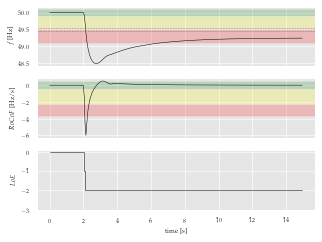

In [23]:
# print(min(fr))
# print(min(rocof))
# fig = plt.figure(None, (10,6))
pt = 1/72.27
fig = plt.figure(None, (360*pt,90*3*pt))
(ax0, ax1,ax2) = fig.subplots(3,1, sharex = True)
ax0.plot(np.arange(0,Thorizon,Tsample), fr, label = 'frequency', linewidth = 0.5, color='black')
# ax0.axvline(x = np.arange(0,Thorizon,Tsample)[fr.index(min(fr))], color = 'grey', linewidth=0.5)
# ax0.axvline(x = np.arange(0,Thorizon,Tsample)[rocof.index(min(rocof))], color = 'grey', linewidth=0.5)
ax0.axhline(y = 49.55, color = 'grey', linestyle= 'dashed', linewidth=0.5)
ax0.axhline(y = 49.45, color = 'grey', linestyle= 'dashed', linewidth=0.5)
# ax0.axhline(y = 48.5, color = 'grey', linewidth=0.5)
ax0.axhspan(49.9, 50.1, facecolor='green', alpha=0.2)
ax0.axhspan(49.5, 49.9, facecolor='yellow', alpha=0.2)
ax0.axhspan(49.1, 49.5, facecolor='red', alpha=0.2)
# ax0.axhspan(48.0, 48.5, facecolor='red', alpha=0.2)

ax0.set_ylabel('$f$ [Hz]')
ax1.plot(np.arange(0,Thorizon,Tsample), rocof, label = 'rocof', linewidth = 0.5, color='black')
# ax1.axvline(x = np.arange(0,Thorizon,Tsample)[fr.index(min(fr))], color = 'grey', linewidth=0.5)
# ax1.axvline(x = np.arange(0,Thorizon,Tsample)[rocof.index(min(rocof))], color = 'grey', linewidth=0.5)
# ax1.axhline(y = -0.45, color = 'grey', linewidth=0.5)
# ax1.axhline(y = -2.3, color = 'grey', linewidth=0.5)
# ax1.axhline(y = -6.4, color = 'grey', linewidth=0.5)
ax1.axhspan(-0.45,0.45, facecolor='green', alpha=0.2)
ax1.axhspan(-2.3, -0.45, facecolor='yellow', alpha=0.2)
# ax1.axhspan(2.3, 0.45, facecolor='yellow', alpha=0.2)
ax1.axhspan(-3.7, -2.3, facecolor='red', alpha=0.2)
# ax1.axhspan(-7.5, -6.4, facecolor='red', alpha=0.2)
ax1.set_ylabel('$RoCoF$ [Hz/s]')
ax2.step(np.arange(0,Thorizon,Tsample), level, label = 'level', where = 'post', linewidth = 0.5, color='black')
# ax2.axvline(x = np.arange(0,Thorizon,Tsample)[fr.index(min(fr))], color = 'grey', linewidth=0.5)
# ax2.axvline(x = np.arange(0,Thorizon,Tsample)[rocof.index(min(rocof))], color = 'grey', linewidth=0.5)
ax2.set_ylabel('$LoE$')
ax2.set_xlabel('time [s]')
ax2.set_yticks([-3,-2,-1,0])

print(min(fr))
print(min(rocof))
print(fr[-1])
plt.savefig(out_dir+'\Level.png',bbox_inches='tight', dpi = 300)  

In [6]:
# plt.step(np.arange(0,Thorizon,Tsample),y = p_diff, where = 'post')

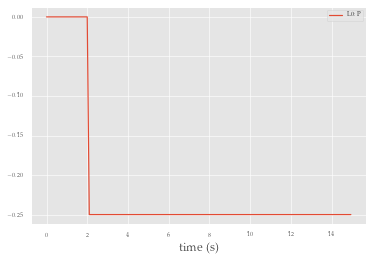

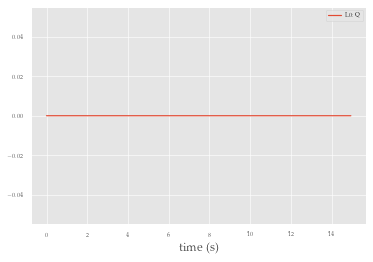

In [7]:
ext = pyramses.extractor(case.getTrj())
# open Monte Carlo results 1
# ext = pyramses.extractor('out1.trj')
plt.style.use("ggplot")

# disturbance
ext.getInj('L0').P.plot()
ext.getInj('L0').Q.plot()



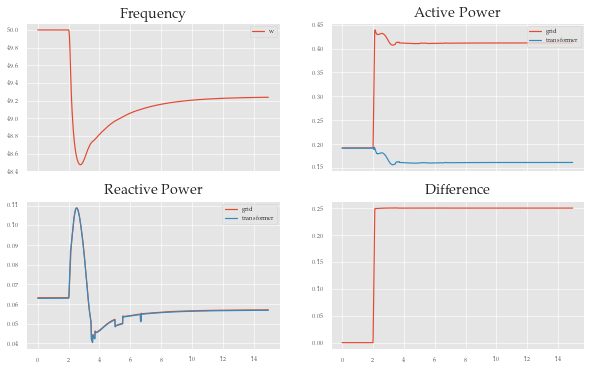

In [8]:
# TN node overview
fig = plt.figure(None, (10,6))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2,2, sharex = True)

w_coi = ext.getSync('G').SC
w = ext.getSync('G').S
pg = ext.getSync('G').P
qg = ext.getSync('G').Q

pt = ext.getBranch('MAINTR').PF
qt = ext.getBranch('MAINTR').QF
diff = pg.value-pt.value
# ax1.plot(w_coi.time, w_coi.value*50+50, label='w_{coi}')
ax1.plot(w.time, w.value*50, label='w')
ax2.plot(pg.time, pg.value, label='grid')
ax2.plot(pt.time, pt.value, label='transformer')
ax3.plot(qg.time, qg.value, label='grid')
ax3.plot(qt.time, qt.value, label='transformer')
ax4.plot(pt.time, diff)
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax1.set_title('Frequency')
ax2.set_title('Active Power')
ax3.set_title('Reactive Power')
ax4.set_title('Difference')
plt.savefig(out_dir+'\TN.pdf')  

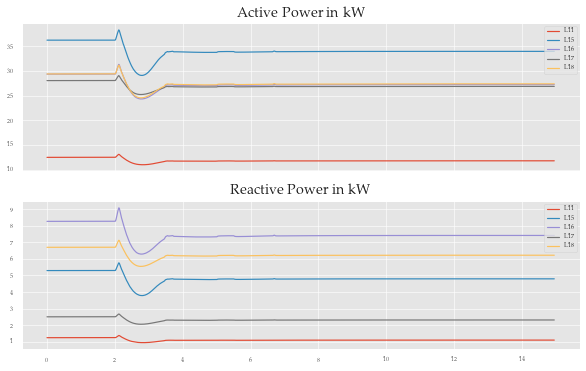

In [9]:
# Loads
loads = ['L11', 'L15', 'L16', 'L17', 'L18']
fig = plt.figure(None, (10,6))
ax1, ax2 = fig.subplots(2,1, sharex = True)

for load in loads:
    p = ext.getInj(load).P
    q = ext.getInj(load).Q
    ax1.plot(p.time, p.value*1000, label=load)
    ax2.plot(q.time, q.value*1000, label=load)

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax1.set_title('Active Power in kW')
ax2.set_title('Reactive Power in kW')
    
plt.savefig(out_dir+'\Loads.pdf')

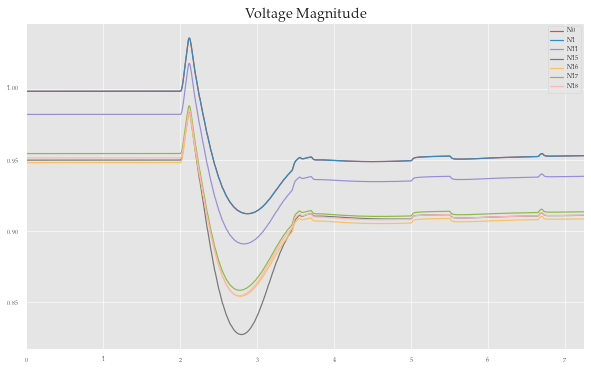

<Figure size 720x432 with 0 Axes>

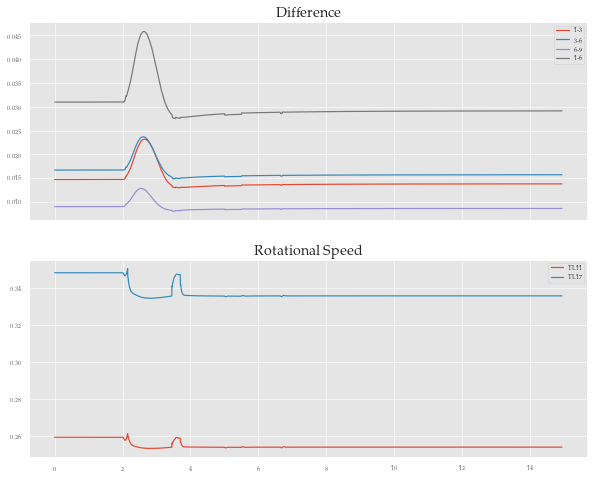

In [10]:
# Voltages
buses = ['N0','N1', 'N11','N15' ,'N16', 'N17', 'N18']
fig = plt.figure(None, (10,6))
ax1 = fig.subplots(1,1, sharex = True)

for bus in buses:
    v = ext.getBus(bus).mag
    ax1.plot(v.time, v.value, label=bus)
    ax1.legend(loc="upper right")
    ax1.set_title('Voltage Magnitude')
    ax1.set_xlim([0,7.25])
plt.savefig('Vn.pdf')  
# with :ram.addDisturb(2, 'CHGPRM INJ L0 P0 -0.08 0.1')
# the load 11 is the only one that is at minimum speed, all the others are not. How does this affect the voltage in the various posiions and their difference?
v1 = ext.getBus('N1').mag
v11 = ext.getBus('N3').mag
v16 = ext.getBus('N6').mag
v17 = ext.getBus('N9').mag
wm11 = ext.getInj('TL11').wm
wm17 = ext.getInj('TL17').wm
d1 = (v1.value - v11.value)/v11.value
d2 = (v11.value - v16.value)/v11.value
d3 = (v16.value - v17.value)/v16.value
d4 = (v1.value - v16.value)/v1.value
# ax1.set_xlim([2.5,3.5])
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(10,8), sharex=True)
ax1.plot(v1.time, d1, label='1-3')
ax1.plot(v1.time, d2, label='3-6')
ax1.plot(v1.time, d3, label='6-9')
ax1.plot(v1.time, d4, label='1-6')
ax1.legend()
ax1.set_title('Difference')
ax2.plot(wm11.time, wm11.value, label='TL11')
ax2.plot(wm17.time, wm17.value, label='TL17')
ax2.legend(loc="upper right")
ax2.set_title('Rotational Speed');



<Figure size 720x432 with 0 Axes>

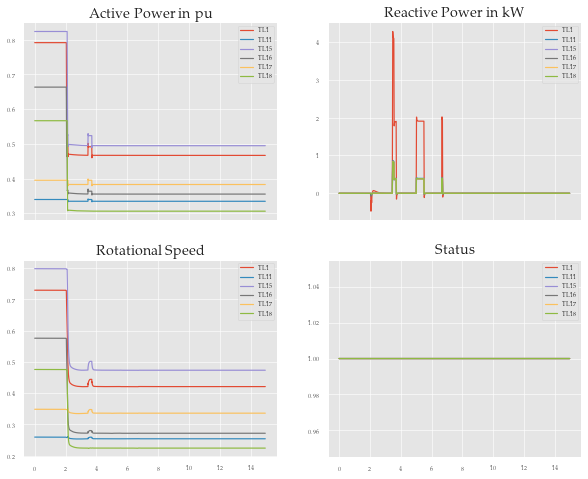

In [11]:
#ATLs 
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# atls = ['TL1']
# atls = ['TL17']
# atls = ['TL11']
# atls = ['TL18']
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,8), sharex=True)

for tl in atls: 
    p = ext.getInj(tl).P
    punit = ext.getInj(tl).Punit
    pref =  ext.getInj(tl).Pref
    q = ext.getInj(tl).Q
    wm = ext.getInj(tl).wm
    # f = ext.getInj(tl).f
    # df = ext.getInj(tl).rocof 
    status = ext.getInj(tl).status
    wm_ref = ext.getInj(tl).wm_ref_lim

    # ax1.plot(p.time, p.value*1000, label=tl)
    ax1.plot(punit.time, punit.value, label=tl)
#     ax1.plot(pref.time, pref.value, label=tl)
    ax1.legend(loc="upper right")
    ax1.set_title('Active Power in pu')
    ax2.plot(q.time, q.value*1000, label=tl)
    ax2.legend(loc="upper right")
    ax2.set_title('Reactive Power in kW')
    ax3.plot(wm.time, wm.value, label=tl)
#     ax3.plot(wm_ref.time, wm_ref.value, label=tl)
    ax3.legend(loc="upper right")
    ax3.set_title('Rotational Speed')
    # ax4.plot(df.time, df.value, label=tl)
    # ax4.legend(loc="upper right")
    # ax4.set_title('rocof')
    # ax5.plot(f.time, f.value, label=tl)
    # ax5.legend(loc="upper right")
    # ax5.set_title('Frequency in Hz')
    ax4.plot(status.time, status.value, label=tl)
    ax4.legend(loc="upper right")
    ax4.set_title('Status')
    # ax4.set_xlim([1.8,4])
    # ax1.set_ylim([0.1, 0.5])
plt.savefig(out_dir+'\ATL.pdf')  

<Figure size 720x432 with 0 Axes>

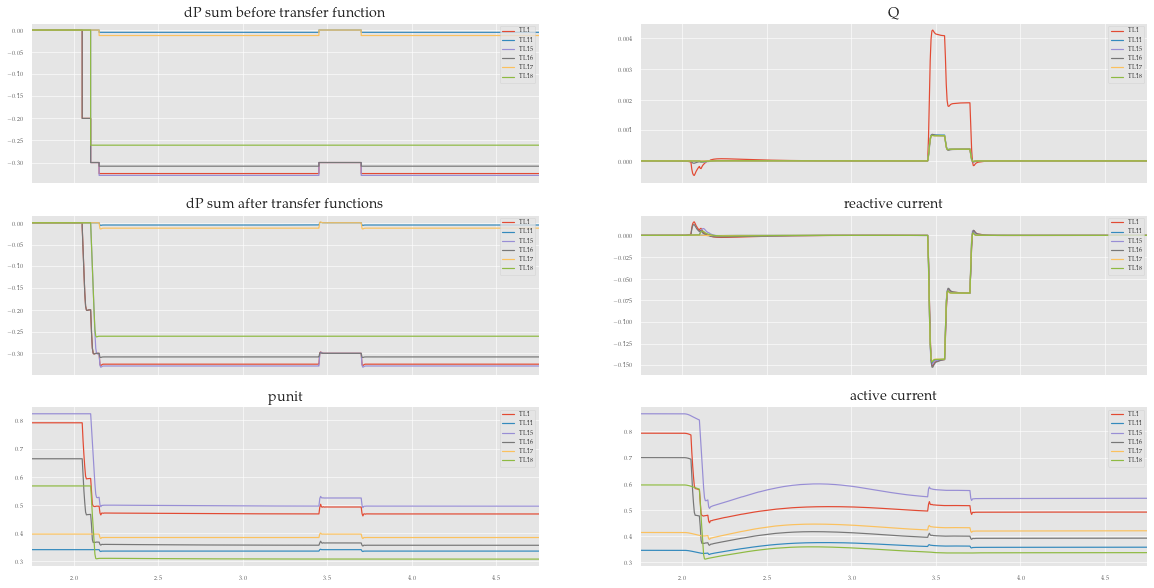

In [12]:
#ATLs central control
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# atls = ['TL1']
# atls = ['TL11']
# atls = ['TL15']
# atls = ['TL16']
# atls = ['TL17']
# atls = ['TL18']
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(20,10), sharex=True)
# fig, (ax1, ax3, ax5) = plt.subplots(3,1,figsize=(25,10), sharex=True)
for tl in atls: 
    p = ext.getInj(tl).P
    punit = ext.getInj(tl).Punit
    Q = ext.getInj(tl).Q
    pref =  ext.getInj(tl).Pref
    # dPc = ext.getInj(tl).dPc    
    # dP_sum1 = ext.getInj(tl).dP_sum1
    # dp = ext.getInj(tl).dp
    F_p_min = ext.getInj(tl).F_p_min
    dP_lim = ext.getInj(tl).dP_lim
    dP_sum = ext.getInj(tl).dP_sum
    # dPc_3 = ext.getInj(tl).dPc_3
    iQ = ext.getInj(tl).iQ
    iP = ext.getInj(tl).iP
    wm = ext.getInj(tl).wm

    # f = ext.getInj(tl).f
    # df = ext.getInj(tl).rocof 
    status = ext.getInj(tl).status
    wm_ref = ext.getInj(tl).wm_ref_lim
    # iT = ext.getInj(tl).iT

    # ax1.plot(p.time, p.value*1000, label=tl)
    # ax1.plot(dPc_3.time, dPc.value, label=tl)
    
    ax1.plot(dP_lim.time, dP_lim.value, label=tl)
    ax1.legend(loc="upper right")
    ax1.set_title('dP sum before transfer function')
    
    ax2.plot(Q.time, Q.value, label=tl)
    ax2.legend(loc="upper right")
    ax2.set_title('Q')

    ax3.plot(dP_sum.time, dP_sum.value, label=tl)
    ax3.legend(loc="upper right")
    ax3.set_title('dP sum after transfer functions')
   
    ax4.plot(iP.time, iQ.value, label=tl)
    ax4.legend(loc="upper right")
    ax4.set_title('reactive current')

    ax5.plot(punit.time, punit.value, label=tl)
    ax5.legend(loc="upper right")
    ax5.set_title('punit')
    # ax5.set_xlim([2.5,2.6])
    # ax5.set_xlim([6.0,6.5])
    # ax5.set_ylim([0.24,0.3])
    # ax5.set_xlim([12.6,13.7])
    ax1.set_xlim([1.75,4.75])
   
    
    ax6.plot(wm.time, iP.value, label=tl)
    ax6.legend(loc="upper right")
    ax6.set_title('active current')
    
plt.savefig(out_dir+'\ATLcentral.pdf')  

<Figure size 720x432 with 0 Axes>

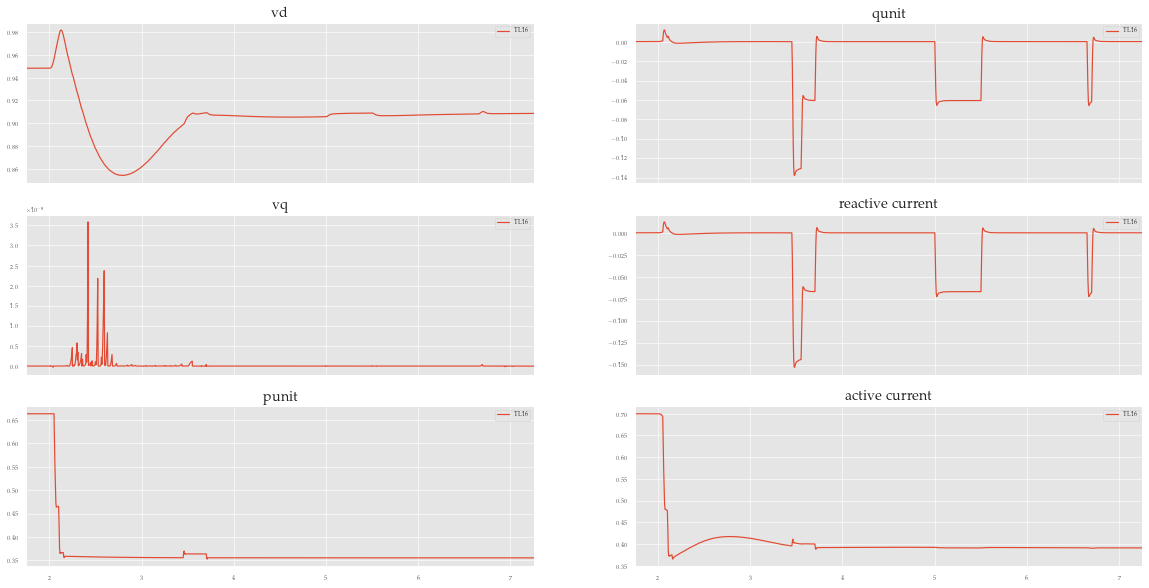

In [13]:
#ATLs central control
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# atls = ['TL1']
# atls = ['TL11']
# atls = ['TL15']
atls = ['TL16']
# atls = ['TL17']
# atls = ['TL18']
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(20,10), sharex=True)
# fig, (ax1, ax3, ax5) = plt.subplots(3,1,figsize=(25,10), sharex=True)
for tl in atls: 
    p = ext.getInj(tl).P
    punit = ext.getInj(tl).Punit
    # qunit = ext.getInj(tl).Qunit
    pref =  ext.getInj(tl).Pref
    # dPc = ext.getInj(tl).dPc    
    # dP_sum1 = ext.getInj(tl).dP_sum1
    # dp = ext.getInj(tl).dp

    # dp = ext.getInj(tl).dp
    F_p_min = ext.getInj(tl).F_p_min
    dP_lim = ext.getInj(tl).dP_lim
    dP_sum = ext.getInj(tl).dP_sum
    dQ_sum = ext.getInj(tl).Qunit
    # dPc_3 = ext.getInj(tl).dPc_3
    iQ = ext.getInj(tl).iQ
    iP = ext.getInj(tl).iP
    wm = ext.getInj(tl).wm
    vd = ext.getInj(tl).vd   
    vq = ext.getInj(tl).vq
    # f = ext.getInj(tl).f
    # df = ext.getInj(tl).rocof 
    status = ext.getInj(tl).status
    wm_ref = ext.getInj(tl).wm_ref_lim
    # iT = ext.getInj(tl).iT

    # ax1.plot(p.time, p.value*1000, label=tl)
    # ax1.plot(dPc_3.time, dPc.value, label=tl)
    
    ax1.plot(dP_lim.time, vd.value, label=tl)
    ax1.legend(loc="upper right")
    ax1.set_title('vd')
    
    ax2.plot(dQ_sum.time, dQ_sum.value, label=tl)
    ax2.legend(loc="upper right")
    ax2.set_title('qunit')

    ax3.plot(dP_sum.time, vq.value, label=tl)
    ax3.legend(loc="upper right")
    ax3.set_title('vq')
   
    ax4.plot(iP.time, iQ.value, label=tl)
    ax4.legend(loc="upper right")
    ax4.set_title('reactive current')

    ax5.plot(punit.time, punit.value, label=tl)
    ax5.legend(loc="upper right")
    ax5.set_title('punit')
    # ax5.set_xlim([1.9,3.0])
    # ax5.set_xlim([6.0,6.5])
    # ax5.set_ylim([0.28,0.31])
    # ax5.set_xlim([12.6,13.7])
    ax1.set_xlim([1.75,7.25])
    # ax1.set_xlim([4.75,5.25])

    
    ax6.plot(wm.time, iP.value, label=tl)
    ax6.legend(loc="upper right")
    ax6.set_title('active current')
    
plt.savefig(out_dir+'\ATLcentral1.pdf')  

<Figure size 1440x576 with 0 Axes>

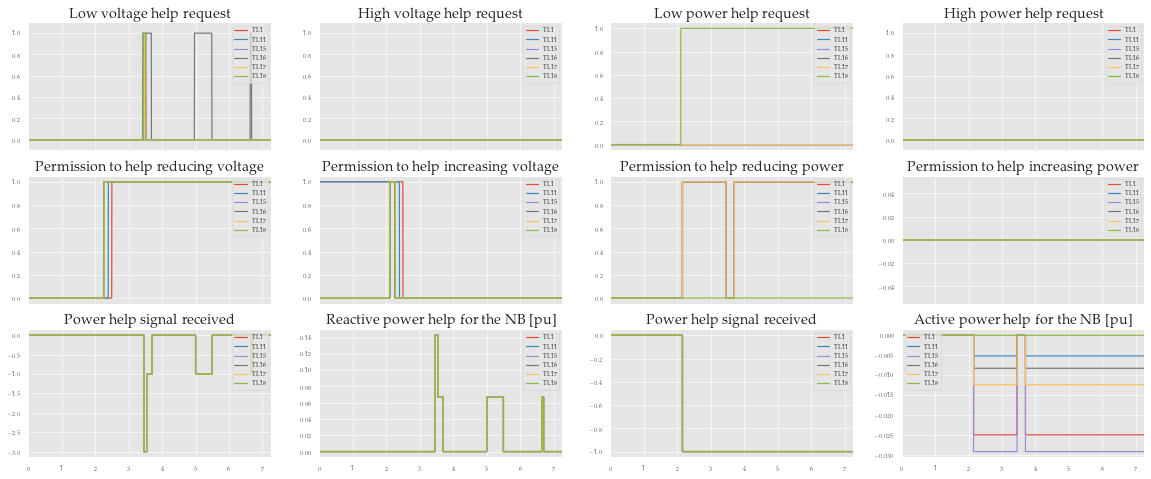

In [14]:
#ATLs neighbourhood control 
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# atls = ['TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# atls = ['TL1']
# atls = ['TL1']
fig = plt.figure(None, (20,8)) 
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4,figsize=(20,8), sharex=True)

for tl in atls: 
    F_v_min = ext.getInj(tl).F_v_min_ou
    F_v_max = ext.getInj(tl).F_v_max_ou
    F_p_min = ext.getInj(tl).F_p_min
    F_p_max = ext.getInj(tl).F_p_max
    F_hlp_high = ext.getInj(tl).F_hlp_high
    F_hlp_low = ext.getInj(tl).F_hlp_low
    F_hlp_p_p2 = ext.getInj(tl).F_hlp_p_p2
    F_hlp_p_m2 = ext.getInj(tl).F_hlp_p_m2 
    dPnb = ext.getInj(tl).dPnb
    dQnb = ext.getInj(tl).dQnb
    P_n = ext.getInj(tl).P_n_var
    V_n = ext.getInj(tl).V_n_var
    # F_p_c_min = ext.getInj(tl).F_p_c_min
    # dPc_no_bound = ext.getInj(tl).dPc_no_bou
    ax1.plot(F_v_min.time, F_v_min.value, label=tl)
    ax1.legend(loc="upper right")
    ax1.set_title('Low voltage help request')
    ax1.set_ylim([-0.1,1.1])
    ax2.plot(F_v_max.time, F_v_max.value, label=tl)
    ax2.legend(loc="upper right")
    ax2.set_title('High voltage help request')
    ax2.set_ylim([-0.1,1.1])
    
    ax3.plot(F_p_min.time, F_p_min.value, label=tl)
    ax3.legend(loc="upper right")
    ax3.set_title('Low power help request')
    # ax4.plot(np.arange(0,Thorizon,Tsample), count_p, label=tl)
    # ax4.legend(loc="upper right")
    # ax4.set_title('count_p')
    ax4.plot(F_p_max.time, F_p_max.value, label=tl)
    ax4.legend(loc="upper right")
    ax4.set_title('High power help request')
    ax4.set_ylim([-0.1,1.1])
    
    ax5.plot(F_hlp_low.time, F_hlp_low.value, label=tl)
    ax5.legend(loc="upper right")
    ax5.set_title('Permission to help reducing voltage')
    ax6.plot(F_hlp_high.time, F_hlp_high.value, label=tl)
    ax6.legend(loc="upper right")
    ax6.set_title('Permission to help increasing voltage')
    
    ax7.plot(F_hlp_p_m2.time, F_hlp_p_m2.value, label=tl)
    ax7.legend(loc="upper right")
    ax7.set_title('Permission to help reducing power')
    ax8.plot(F_hlp_p_p2.time, F_hlp_p_p2.value, label=tl)
    ax8.legend(loc="upper right")
    ax8.set_title('Permission to help increasing power')

    ax9.plot(V_n.time, V_n.value, label=tl)
    ax9.legend(loc="upper right")
    ax9.set_title('Power help signal received')
    ax10.plot(dQnb.time, dQnb.value, label=tl)
    ax10.legend(loc="upper right")
    ax10.set_title('Reactive power help for the NB [pu]')
    # ax10.set_ylim([-0.1,1.1])
    
    ax11.plot(P_n.time, P_n.value, label=tl)
    ax11.legend(loc="upper right")
    ax11.set_title('Power help signal received')
    ax12.plot(dPnb.time, dPnb.value, label=tl)
    ax12.legend(loc="upper left")
    ax12.set_title('Active power help for the NB [pu]')
    ax1.set_xlim([0,7.25])

    # ax5.set_xlim([5.98,6.02])
    # ax1.set_xlim([4.75,5.25])

plt.savefig(out_dir+'\ATLneighbourhood.pdf')  


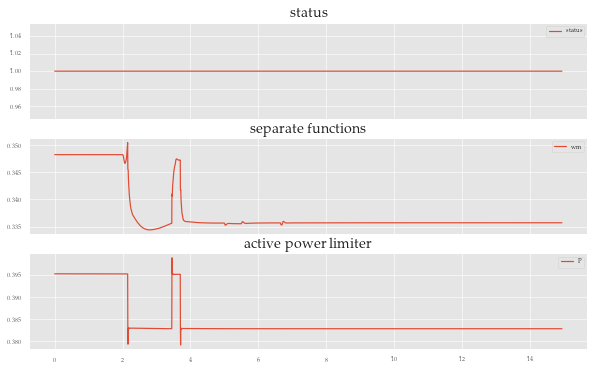

In [15]:
# protection tripping
# ffl = ext.getInj('TL11').Ffl
# ffh = ext.getInj('TL11').Ffh
# ffr =ext.getInj('TL11').Ffr
# fvl =ext.getInj('TL11').Fvl
# fvh =ext.getInj('TL11').Fvh
status = ext.getInj('TL17').status

# Pref_lim = ext.getInj('TL17').Plim
P = ext.getInj('TL17').Punit

wm_ref = ext.getInj('TL17').wm_ref_lim
wm = ext.getInj('TL17').wm



fig = plt.figure(None, (10,6))
ax1, ax2, ax3 = fig.subplots(3,1, sharex=True)

ax1.plot(status.time, status.value, label='status')
# ax1.set_xlim([1.5,2.1])

ax1.set_title('status')
ax2.set_title('separate functions')
ax3.set_title('active power limiter')
# ax3.set_title('rotational speed limiter')

ax1.legend(loc="upper right")


# individual functions
# ax2.plot(ffl.time, ffl.value, label='underfrequency')
# ax2.plot(ffh.time, ffh.value, label='overfrequency')
# ax2.plot(ffr.time, ffr.value, label='rocof')
# ax2.plot(fvl.time, fvl.value, label='undervoltage')
# ax2.plot(fvh.time, fvh.value, label='overvoltage')
# ax2.legend(loc="upper right")

# active power limit
ax3.plot(P.time, P.value, label='P')
# ax3.plot(Pref_lim.time, Pref_lim.value, label='Preflim')

# ax2.plot(wm_ref.time, wm_ref.value, label='wm_ref')
# ax2.plot(wm_ref_lim.time, wm_ref_lim.value, label='wm_ref_lim')
ax2.plot(wm.time, wm.value, label='wm')
ax2.legend(loc="upper right")

ax3.legend(loc="upper right")


<Figure size 720x432 with 0 Axes>

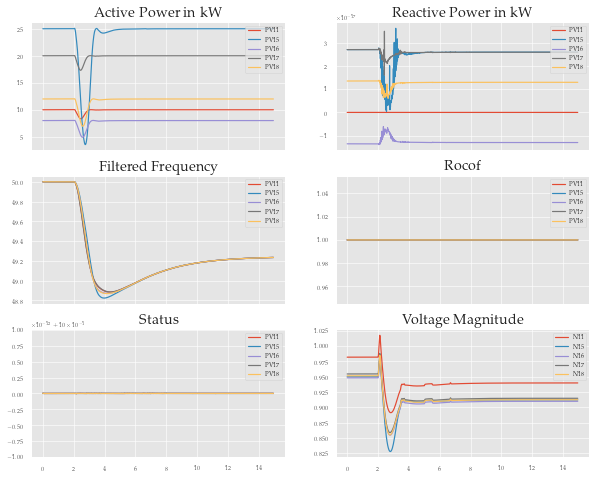

In [16]:
#VSCs 
vscs = ['PV11','PV15', 'PV16','PV17', 'PV18'] 
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,8), sharex=True)

for vsc in vscs: 
    p = ext.getInj(vsc).Pgen 
    q = ext.getInj(vsc).Qgen 
    w = ext.getInj(vsc).fmfilt
    df = ext.getInj(vsc).rocof
    status = ext.getInj(vsc).status
    Fr = ext.getInj(vsc).Frtemp
    #Fvl = ext.getInj(vsc).Fvl
    # dp_sum  = ext.getInj(vsc).dP_sum
    vq = ext.getInj(vsc).vq
    iP = ext.getInj(vsc).Ip
    vd = ext.getInj(vsc).vd
        
    ax1.plot(p.time, p.value*1000, label=vsc)
    ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
    ax2.plot(q.time, q.value*1000, label=vsc)
    ax2.legend(loc="upper right")
    ax2.set_title('Reactive Power in kW')
    ax3.plot(w.time, w.value, label=vsc)
    ax3.legend(loc="upper right")
    ax3.set_title('Filtered Frequency')
    ax4.plot(df.time, Fr.value, label=vsc)
    ax4.legend(loc="upper right")
    ax4.set_title('Rocof')
    ax5.plot(status.time, status.value, label=vsc)
    ax5.legend(loc="upper right")
    ax5.set_title('Status')
    # ax5.set_ylim([-0.05, 1.05])
 

# Voltages
buses = ['N11','N15' ,'N16', 'N17', 'N18']

for bus in buses:
    v = ext.getBus(bus).mag
    ax6.plot(v.time, v.value, label=bus)
    ax6.legend(loc="upper right")
    ax6.set_title('Voltage Magnitude')

plt.savefig(out_dir+'\PV.pdf') 

<Figure size 720x432 with 0 Axes>

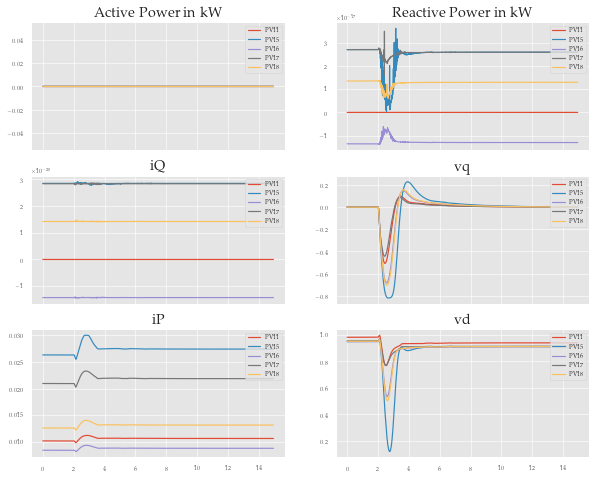

In [17]:
#VSCs 
vscs = ['PV11','PV15', 'PV16','PV17', 'PV18'] 
fig = plt.figure(None, (10,6)) 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10,8), sharex=True)

for vsc in vscs: 
    p = ext.getInj(vsc).dQnb 
    q = ext.getInj(vsc).Qgen 
    w = ext.getInj(vsc).fmfilt
    df = ext.getInj(vsc).rocof
    status = ext.getInj(vsc).status
    #Fvl = ext.getInj(vsc).Fvl
    # dp_sum  = ext.getInj(vsc).dP_sum
    vq = ext.getInj(vsc).vq
    iP = ext.getInj(vsc).Ip
    iQ = ext.getInj(vsc).Iq
    vd = ext.getInj(vsc).vd
        
    ax1.plot(p.time, p.value*1000, label=vsc)
    ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
    ax2.plot(q.time, q.value*1000, label=vsc)
    ax2.legend(loc="upper right")
    ax2.set_title('Reactive Power in kW')
    ax3.plot(iQ.time, iQ.value, label=vsc)
    ax3.legend(loc="upper right")
    ax3.set_title('iQ')
    ax4.plot(vq.time, vq.value, label=vsc)
    ax4.legend(loc="upper right")
    ax4.set_title('vq')
    ax5.plot(status.time, iP.value, label=vsc)
    ax5.legend(loc="upper right")
    ax5.set_title('iP')
    # ax5.set_ylim([-0.05, 1.05])
    ax6.plot(vd.time, vd.value, label=vsc)
    ax6.legend(loc="upper right")
    ax6.set_title('vd')

plt.savefig(out_dir+'\PV1.pdf') 

Text(0.5, 1.0, 'Frequency')

<Figure size 720x432 with 0 Axes>

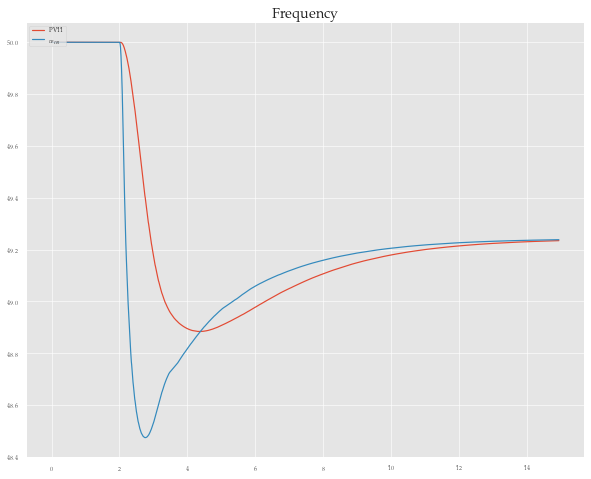

In [18]:
vscs = ['PV11']
atls=['TL18', 'TL1']
fig = plt.figure(None, (10,6)) 
fig, ((ax1)) = plt.subplots(1,1,figsize=(10,8), sharex=True)

for vsc in vscs: 
    f = ext.getInj(vsc).fmfilt
    ax1.plot(f.time, f.value, label=vsc)

# for tl in atls:
#     f = ext.getInj(tl).f
#     ax1.plot(f.time, f.value, label = tl)
w_coi = ext.getSync('G').S
ax1.plot(w_coi.time, w_coi.value*50, label='$w_{coi}$')
ax1.legend(loc="upper left")
ax1.set_title('Frequency')

# ax1.set_xlim([0, 15])

<Figure size 720x432 with 0 Axes>

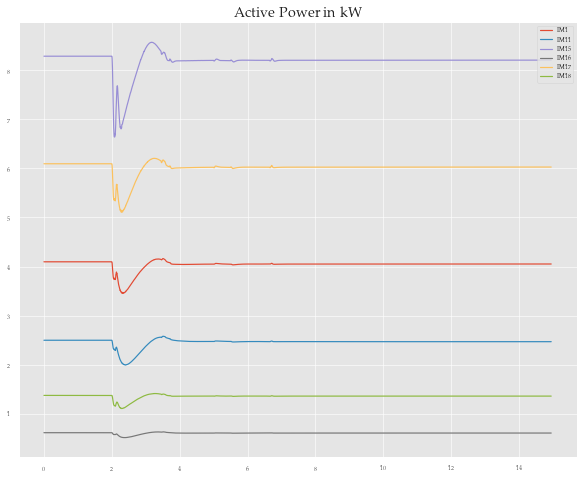

In [19]:
# Induction machines
ims = ['IM1','IM11', 'IM15', 'IM16', 'IM17', 'IM18'] 
fig = plt.figure(None, (10,6)) 
fig, ((ax1)) = plt.subplots(1,1,figsize=(10,8), sharex=True)

for im in ims: 
    p = ext.getInj(im).P 
#     q = ext.getInj(im).q
    ax1.plot(p.time, p.value*1000, label=im)
    ax1.legend(loc="upper right")
    ax1.set_title('Active Power in kW')
#     ax2.plot(q.time, q.value*1000, label=im)
#     ax2.legend(loc="upper right")
#     ax2.set_title('Reactive Power in kVar')    
plt.savefig(out_dir+'\IM.pdf')  

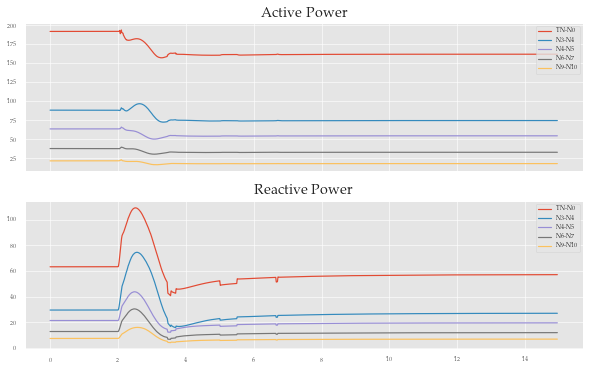

In [20]:
# TN node overview
lines = ['TN-N0','N3-N4', 'N4-N5', 'N6-N7', 'N9-N10']
fig = plt.figure(None, (10,6))
ax1, ax2 = fig.subplots(2,1, sharex = True)


for line in lines:
    pt = ext.getBranch(line).PF
    qt = ext.getBranch(line).QF

    ax1.plot(pt.time, pt.value*1000, label=line)
    ax2.plot(qt.time, qt.value*1000, label=line)

ax1.legend(loc="upper right")
ax2.legend(loc="upper right")

ax1.set_title('Active Power')
ax2.set_title('Reactive Power')

plt.savefig(out_dir+'\Lines.pdf')  

min frequency: 48.474905255005865
max frequency: 50.00000000000061
min rocof: -6.307765572043536
max rocof: 0.5274585477736764


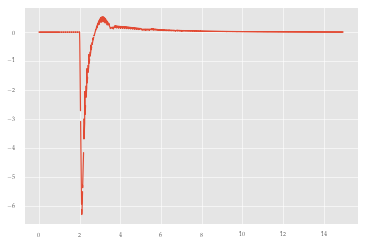

In [21]:
# Get minimum and maximum frequency
w_coi = ext.getSync('G').S
fmax = w_coi.value[np.argmax(w_coi.value)]*50
fmin = w_coi.value[np.argmin(w_coi.value)]*50

print('min frequency: '+str(fmin))
print('max frequency: '+str(fmax))


# ROCOF
from numpy import diff
# df =  diff(w_coi.value)/diff(w_coi.time)
df = np.gradient(w_coi.value*50,w_coi.time);
plt.plot(w_coi.time,df)
dfmax = df[np.nanargmax(df)]
dfmin = df[np.nanargmin(df)]

print('min rocof: '+str(dfmin))
print('max rocof: '+str(dfmax))





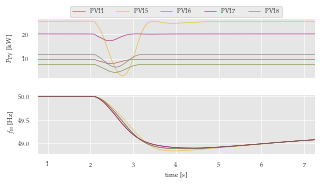

In [22]:
import seaborn as sns
from matplotlib import rc

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
# colors_ blue, red, yellow, green. purple gray light blue dark blue dark green
palette1 = ["#1269b0","#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']
# palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
palette2 = ["#a8322d",'#edb120','#72791c', "#91056a", '#6f6f64', '#007a96', '#1f407a','#485a2c']

sns.set_palette(palette2)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)


LVbuses_loads = [1,11,15,16,17,18]
LVbuses_PV = [11,15,16,17,18]


pt = 1/72.27

parameters = '\n'.join(('H = 6 s',
                        '$\Delta P$ = 1.5 MW',
                        ))

fig,axs = plt.subplots(2,1, figsize = (360*pt, 2*90*pt), sharex='col', sharey = 'row')
fig.subplots_adjust(hspace=0.25, wspace = 0.05)
axs = axs.ravel()
w = ext.getSync('G').S
vscs = ['PV11','PV15', 'PV16','PV17', 'PV18'] 

for vsc in vscs: 
    p = ext.getInj(vsc).Pgen 
    q = ext.getInj(vsc).Qgen 
    w = ext.getInj(vsc).fmfilt
    df = ext.getInj(vsc).rocof
    status = ext.getInj(vsc).status
    Fr = ext.getInj(vsc).Frtemp
    #Fvl = ext.getInj(vsc).Fvl
    # dp_sum  = ext.getInj(vsc).dP_sum
    vq = ext.getInj(vsc).vq
    iP = ext.getInj(vsc).Ip
    vd = ext.getInj(vsc).vd
        
    axs[0].plot(p.time, p.value*1000, label=vsc, linewidth=0.5)
    # axs[0].legend(loc="upper right")
    # axs[0].set_title('Active Power in kW')
    # ax2.plot(q.time, q.value*1000, label=vsc)
    # ax2.legend(loc="upper right")
    # ax2.set_title('Reactive Power in kW')
    axs[1].plot(w.time, w.value, label=vsc, linewidth=0.5)
    # axs[1].legend(loc="upper right")
    # axs[1].set_title('Measured Frequency')
    # ax4.plot(df.time, Fr.value, label=vsc)
    # ax4.legend(loc="upper right")
    # ax4.set_title('Rocof')
    # ax5.plot(status.time, status.value, label=vsc)
    # ax5.legend(loc="upper right")
    # ax5.set_title('Status')
    # ax5.set_ylim([-0.05, 1.05])
#     axs[0].plot(Pgen.time, Pgen.value, linewidth=0.4)

#     status = ext.getInj(unit).status
#     axs[2].plot(punit.time, punit.value, linewidth=0.4)
#     ax2.legend(loc="upper right")
    # axs[3].set_title('Reactive Power in kVar')
    # axs[3].plot(qunit.time, qunit.value, label=unit)
# axs[2].set_title('Active Power')
# axs[2].set_ylabel('$p_\mathrm{atl}$ [p.u.]')
# props = dict(boxstyle='square', facecolor='white', alpha=0.5)
# axs[0].text(0.95, 0.87,parameters, bbox=props, transform=axs[0].transAxes, ha = 'right', va = 'top')
axs[0].set_ylabel('$P_\mathrm{PV}$ [kW]')
axs[1].set_ylabel('$f_m$ [Hz]')
axs[1].set_xlabel('time [s]')
axs[0].set_xlim([0.75, 7.25])
axs[0].legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.25), ncol=len(vscs))

fig.align_ylabels(axs[:])    
fig.savefig(out_dir + '\\PV.png',bbox_inches='tight', dpi = 300)
    
# plt.savefig(out_dir+'Vn.pdf')  